**Section 2**

In [2]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

In [3]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn import datasets
import numpy as np

X = iris.data  # Feature matrix (4 features)
y = iris.target  # Class labels (0, 1, 2)

print("X matrix :", X.shape)
print("y matrix:", y.shape)

# Step 2: One-hot encode labels
y = y.reshape(-1, 1)  # Reshape to column vector for encoding
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

# Step 3: Split the dataset
# First, split into training (70%) and temporary (30%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y)

# Further split temp set into validation (10%) and testing (20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42, stratify=y_temp)

# Step 4: Normalize feature values to [0,1] using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform training data
X_val = scaler.transform(X_val)  # Transform validation data
X_test = scaler.transform(X_test)  # Transform test data

# Print dataset shapes
print("\nDataset Splits:")
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")


X matrix : (150, 4)
y matrix: (150,)

Dataset Splits:
Training set: (105, 4), (105, 3)
Validation set: (15, 4), (15, 3)
Testing set: (30, 4), (30, 3)


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

# Create DataLoader for batch processing
batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


**Task 2.1:  Hyperparameter Optimization**

Use the model trained in the previous section.

Train the model on the batch size of [2 & 4], learning rate [1e-3 and 1e-5], and epochs [1, 3, and 5].

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

# Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden = nn.Linear(4, 16)
        self.output = nn.Linear(16, 3)

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = self.output(x)  # No softmax needed for CrossEntropyLoss
        return x

# Convert dataset to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(np.argmax(y_train, axis=1), dtype=torch.long)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(np.argmax(y_test, axis=1), dtype=torch.long)

# Function to train a model
def train_model(batch_size, learning_rate, epochs):
    print(f"\nTraining Model -> Batch Size: {batch_size}, LR: {learning_rate}, Epochs: {epochs}")

    # Prepare DataLoader
    train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Initialize Model, Loss Function, and Optimizer
    model = MLP()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Training Loop
    for epoch in range(epochs):
        model.train()
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()

    # Evaluate Model
    model.eval()
    with torch.no_grad():
        y_pred_logits = model(X_test_tensor)
        y_pred = torch.argmax(y_pred_logits, dim=1).numpy()
        y_true = y_test_tensor.numpy()

    # Compute Performance Metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted", zero_division=0)

    print(f"Accuracy: {accuracy:.4f}, F1-score: {f1:.4f}")

    return model, y_true, y_pred


In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix using Matplotlib
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 5))
    plt.imshow(cm, interpolation="nearest", cmap="Blues")
    plt.colorbar()

    # Add labels
    classes = ["Class 0", "Class 1", "Class 2"]
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Add text annotations
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, cm[i, j], ha="center", va="center", color="black", fontsize=12)

    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix ({title})")
    plt.show()


Train the model and measure the accuracy and F1 over the test set. Plot the confusion matrix over the test-set predictions.
Plot using the truth labels and predicted labels in matplotlib.



Training Model -> Batch Size: 2, LR: 0.001, Epochs: 1
Accuracy: 0.6333, F1-score: 0.6411

Model 1: Batch 2, LR 0.001, Epochs 1
Test Accuracy: 0.6333
Test F1-Score: 0.6411


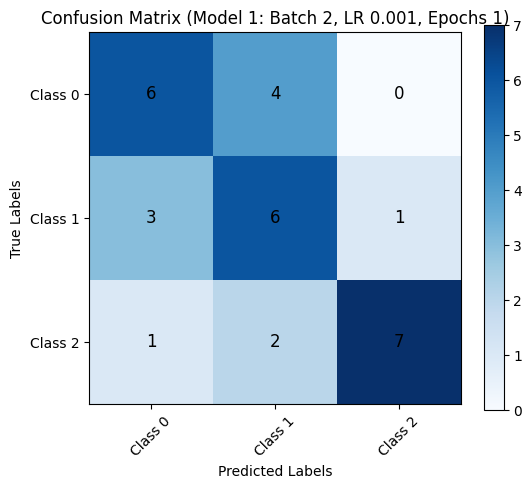


Training Model -> Batch Size: 2, LR: 0.001, Epochs: 3
Accuracy: 0.3667, F1-score: 0.2828

Model 2: Batch 2, LR 0.001, Epochs 3
Test Accuracy: 0.3667
Test F1-Score: 0.2828


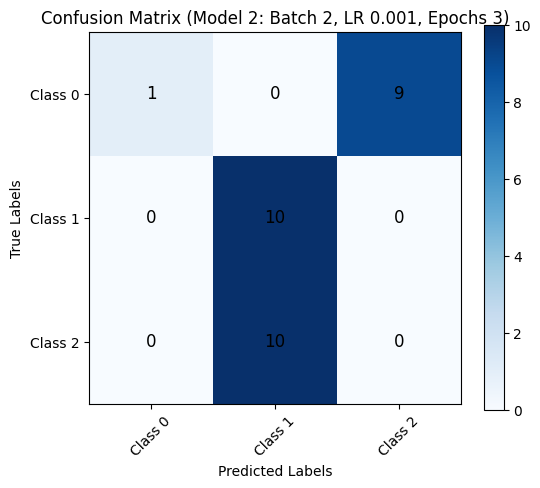


Training Model -> Batch Size: 2, LR: 0.001, Epochs: 5
Accuracy: 0.6667, F1-score: 0.5556

Model 3: Batch 2, LR 0.001, Epochs 5
Test Accuracy: 0.6667
Test F1-Score: 0.5556


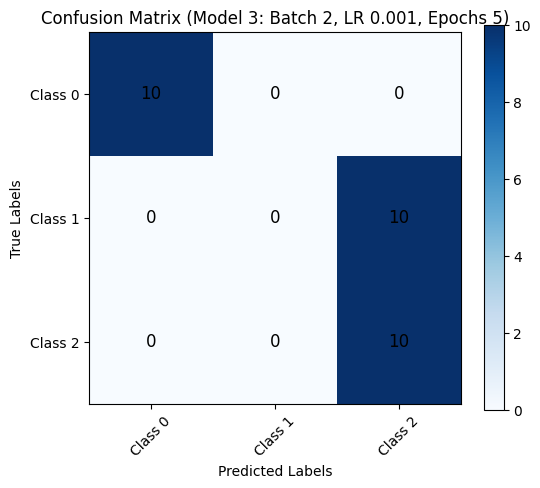


Training Model -> Batch Size: 2, LR: 1e-05, Epochs: 1
Accuracy: 0.3333, F1-score: 0.1667

Model 4: Batch 2, LR 1e-05, Epochs 1
Test Accuracy: 0.3333
Test F1-Score: 0.1667


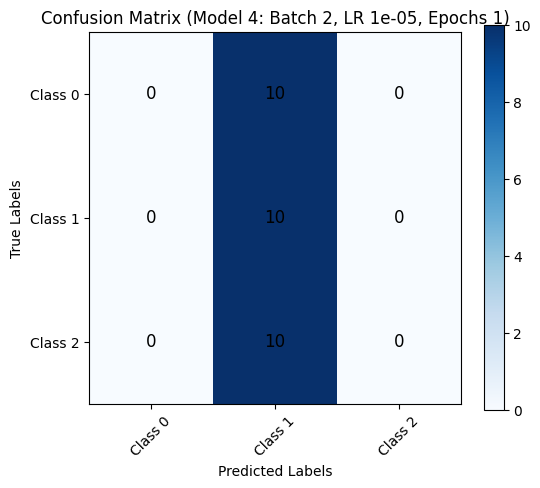


Training Model -> Batch Size: 2, LR: 1e-05, Epochs: 3
Accuracy: 0.3333, F1-score: 0.1667

Model 5: Batch 2, LR 1e-05, Epochs 3
Test Accuracy: 0.3333
Test F1-Score: 0.1667


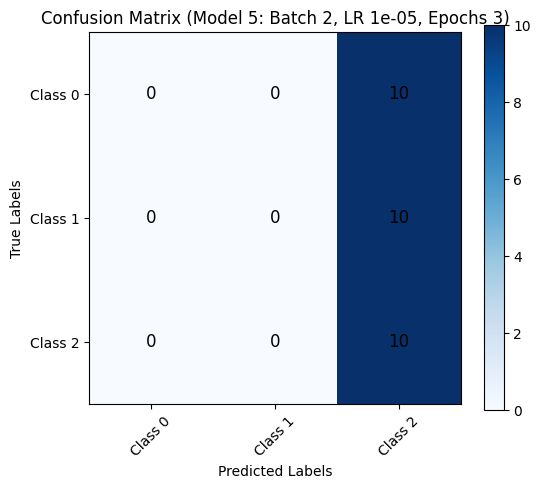


Training Model -> Batch Size: 2, LR: 1e-05, Epochs: 5
Accuracy: 0.0333, F1-score: 0.0247

Model 6: Batch 2, LR 1e-05, Epochs 5
Test Accuracy: 0.0333
Test F1-Score: 0.0247


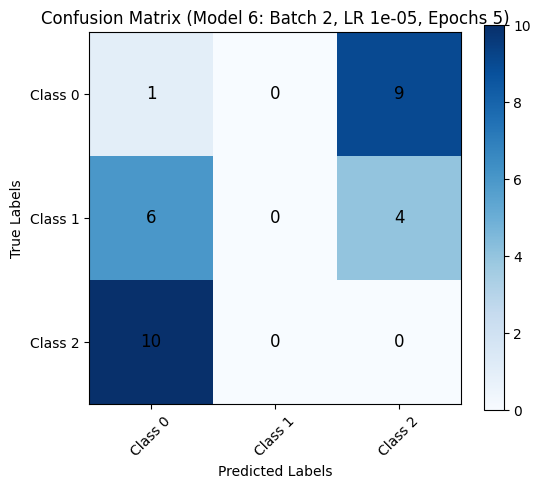


Training Model -> Batch Size: 4, LR: 0.001, Epochs: 1
Accuracy: 0.3333, F1-score: 0.1667

Model 7: Batch 4, LR 0.001, Epochs 1
Test Accuracy: 0.3333
Test F1-Score: 0.1667


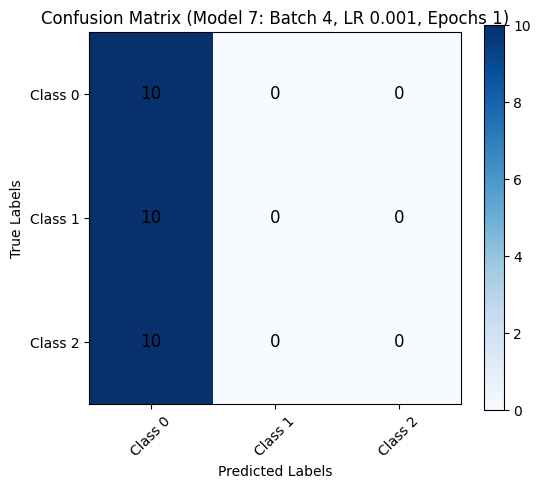


Training Model -> Batch Size: 4, LR: 0.001, Epochs: 3
Accuracy: 0.4000, F1-score: 0.2865

Model 8: Batch 4, LR 0.001, Epochs 3
Test Accuracy: 0.4000
Test F1-Score: 0.2865


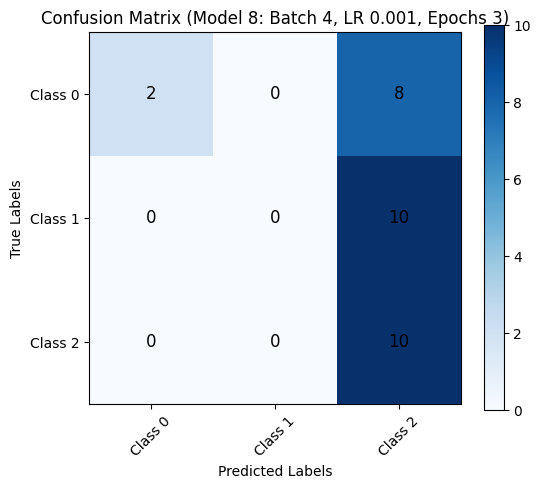


Training Model -> Batch Size: 4, LR: 0.001, Epochs: 5
Accuracy: 0.3333, F1-score: 0.1667

Model 9: Batch 4, LR 0.001, Epochs 5
Test Accuracy: 0.3333
Test F1-Score: 0.1667


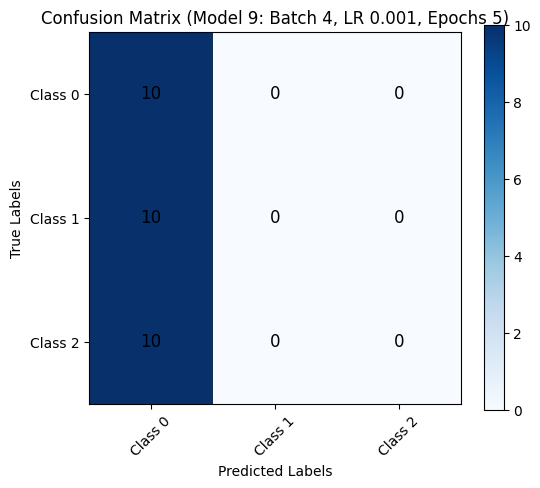


Training Model -> Batch Size: 4, LR: 1e-05, Epochs: 1
Accuracy: 0.3333, F1-score: 0.1667

Model 10: Batch 4, LR 1e-05, Epochs 1
Test Accuracy: 0.3333
Test F1-Score: 0.1667


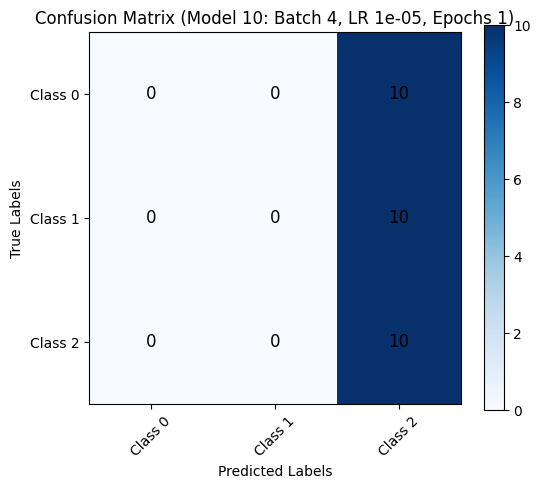


Training Model -> Batch Size: 4, LR: 1e-05, Epochs: 3
Accuracy: 0.0000, F1-score: 0.0000

Model 11: Batch 4, LR 1e-05, Epochs 3
Test Accuracy: 0.0000
Test F1-Score: 0.0000


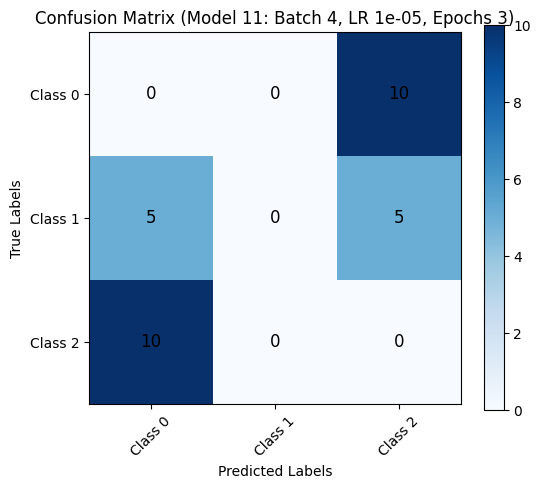


Training Model -> Batch Size: 4, LR: 1e-05, Epochs: 5
Accuracy: 0.3333, F1-score: 0.1667

Model 12: Batch 4, LR 1e-05, Epochs 5
Test Accuracy: 0.3333
Test F1-Score: 0.1667


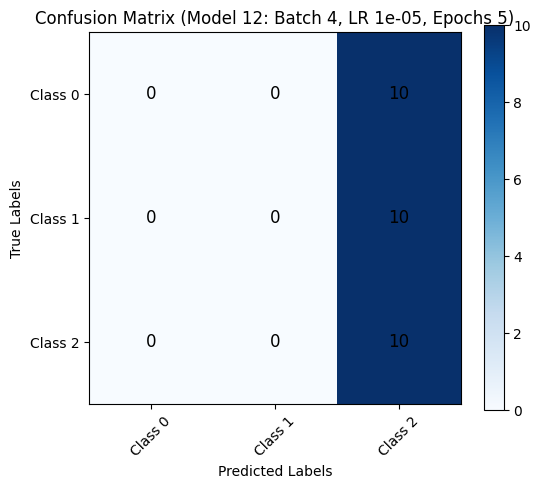

In [11]:
# Store results in a variable (list of dictionaries)
trained_models = []

# Define the hyperparameter combinations
batch_sizes = [2, 4]
learning_rates = [1e-3, 1e-5]
epochs_list = [1, 3, 5]

# Define hyperparameters (Ensure this is defined)
#all the possible combinations of batch_sizes, lr, epochs
hyperparams = [
    (2, 1e-3, 1),
    (2, 1e-3, 3),
    (2, 1e-3, 5),
    (2, 1e-5, 1),
    (2, 1e-5, 3),
    (2, 1e-5, 5),
    (4, 1e-3, 1),
    (4, 1e-3, 3),
    (4, 1e-3, 5),
    (4, 1e-5, 1),
    (4, 1e-5, 3),
    (4, 1e-5, 5)

]

# Train models separately and store results
index = 1  # Manual index tracking instead of enumerate
for params in hyperparams:
    batch_size, learning_rate, epochs = params
    model, y_true, y_pred = train_model(batch_size, learning_rate, epochs)

    title = f"Model {index}: Batch {batch_size}, LR {learning_rate}, Epochs {epochs}"

    # Compute Performance Metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted", zero_division=0)

    # Store model details
    trained_models.append({
        "title": title,
        "model": model,
        "y_true": y_true,
        "y_pred": y_pred,
        "accuracy": accuracy,
        "f1_score": f1
    })

    print(f"\n{title}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Test F1-Score: {f1:.4f}")

    # Plot confusion matrix
    plot_confusion_matrix(y_true, y_pred, title)

    index += 1  # Increment index manually


Show the inputs, prediction, and truth values for five samples from the test set.

In [12]:
# Select 5 specific test samples from the existing test set
sample_indices = [0, 5, 10, 15, 20]

In [13]:
from tabulate import tabulate

# Function to create a table comparing predictions of all models
def compare_model_predictions(sample_indices, X_test, trained_models):
    headers = ["Sample Index", "True Label"] + [model["title"] for model in trained_models]
    table_data = []

    for idx in sample_indices:
        row = [idx, trained_models[0]["y_true"][idx]]  # Start row with index and true label
        for model in trained_models:
            row.append(model["y_pred"][idx])  # Append predictions from each model
        table_data.append(row)

    print("\nComparison of Model Predictions on Selected Test Samples:")
    print(tabulate(table_data, headers=headers, tablefmt="grid"))

# Call the function after training all models
compare_model_predictions(sample_indices, X_test, trained_models)



Comparison of Model Predictions on Selected Test Samples:
+----------------+--------------+----------------------------------------+----------------------------------------+----------------------------------------+----------------------------------------+----------------------------------------+----------------------------------------+----------------------------------------+----------------------------------------+----------------------------------------+-----------------------------------------+-----------------------------------------+-----------------------------------------+
|   Sample Index |   True Label |   Model 1: Batch 2, LR 0.001, Epochs 1 |   Model 2: Batch 2, LR 0.001, Epochs 3 |   Model 3: Batch 2, LR 0.001, Epochs 5 |   Model 4: Batch 2, LR 1e-05, Epochs 1 |   Model 5: Batch 2, LR 1e-05, Epochs 3 |   Model 6: Batch 2, LR 1e-05, Epochs 5 |   Model 7: Batch 4, LR 0.001, Epochs 1 |   Model 8: Batch 4, LR 0.001, Epochs 3 |   Model 9: Batch 4, LR 0.001, Epochs 5 |   Model 1